# Probability and Statistics for Machine Learning

> **Probability is the study of the likelihood of events, quantifying uncertainty by assigning a number between 0 and 1 to the chance of something happening. Statistics is the discipline of collecting, analyzing, interpreting, and presenting data to make inferences and draw conclusions about populations or processes, often using probability theory to understand patterns in the data.**




**"Probability is the very guide of life."** - Cicero

## Learning Objectives
- Understand fundamental probability concepts
- Master statistical distributions and their properties
- Learn hypothesis testing and confidence intervals
- Apply statistical methods to machine learning problems
- Build intuition for uncertainty in data


## 1. Basic Probability Concepts

### Sample Space and Events
- **Sample Space (Ω)**: The set of all possible outcomes
- **Event**: A subset of the sample space
- **Probability**: A measure of how likely an event is to occur

### Probability Rules
1. **Non-negativity**: P(A) ≥ 0 for any event A
2. **Normalization**: P(Ω) = 1
3. **Additivity**: P(A ∪ B) = P(A) + P(B) for mutually exclusive events


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Example: Rolling a fair die
sample_space = [1, 2, 3, 4, 5, 6]
print(f"Sample space: {sample_space}")

# Probability of rolling an even number
even_numbers = [2, 4, 6]
p_even = len(even_numbers) / len(sample_space)
print(f"Probability of rolling an even number: {p_even}")

# Probability of rolling a number greater than 4
greater_than_4 = [5, 6]
p_greater_than_4 = len(greater_than_4) / len(sample_space)
print(f"Probability of rolling > 4: {p_greater_than_4}")

# Probability of rolling an even number OR > 4 (using inclusion-exclusion)
p_even_or_greater = p_even + p_greater_than_4 - (1/6)  # subtract overlap (6)
print(f"Probability of even OR > 4: {p_even_or_greater}")


Sample space: [1, 2, 3, 4, 5, 6]
Probability of rolling an even number: 0.5
Probability of rolling > 4: 0.3333333333333333
Probability of even OR > 4: 0.6666666666666666


## 2. Conditional Probability and Bayes' Theorem - Made Simple!

### What is Conditional Probability? (Think of it like this...)

Imagine you're at a party with 100 people:
- 60 people are wearing red shirts
- 40 people are wearing blue shirts
- 30 people are wearing red shirts AND are tall
- 10 people are wearing blue shirts AND are tall

**Question:** If I tell you someone is wearing a red shirt, what's the probability they're tall?

**Answer:** Out of the 60 people wearing red shirts, 30 are tall. So the probability is 30/60 = 0.5 or 50%.

**This is conditional probability!** We're asking: "Given that someone is wearing red, what's the probability they're tall?"

### The Formula (Simple Version)

**P(Tall | Red Shirt) = P(Tall AND Red) / P(Red)**

- P(Tall | Red Shirt) = 30/100 ÷ 60/100 = 30/60 = 0.5
- The "|" means "given that" or "if we know that"

### Real-World Examples

1. **Weather:** "If it's cloudy, what's the probability it will rain?"
2. **Medical:** "If someone has a fever, what's the probability they have the flu?"
3. **Shopping:** "If someone buys milk, what's the probability they'll also buy bread?"
4. **Sports:** "If a team is winning at halftime, what's the probability they'll win the game?"

### Bayes' Theorem - The "Update Your Beliefs" Rule

**Bayes' Theorem** is like updating your opinion when you get new information.

**Simple Formula:**
**P(A|B) = P(B|A) × P(A) / P(B)**

**In words:** "The probability of A given B equals the probability of B given A times the probability of A, divided by the probability of B."

### Why is Bayes' Theorem Important?

1. **Medical Testing:** "If I test positive for a disease, what's the probability I actually have it?"
2. **Spam Detection:** "If an email contains certain words, what's the probability it's spam?"
3. **Recommendation Systems:** "If a user likes action movies, what's the probability they'll like this new action movie?"
4. **Machine Learning:** Many algorithms use Bayes' theorem to make predictions!

### The Key Insight

Bayes' theorem helps us **update our beliefs** when we get new evidence. It's like being a detective who gets new clues and updates their theory about who committed the crime!


Probability of disease given positive test: 0.088
This means only 8.8% of positive tests are true positives!


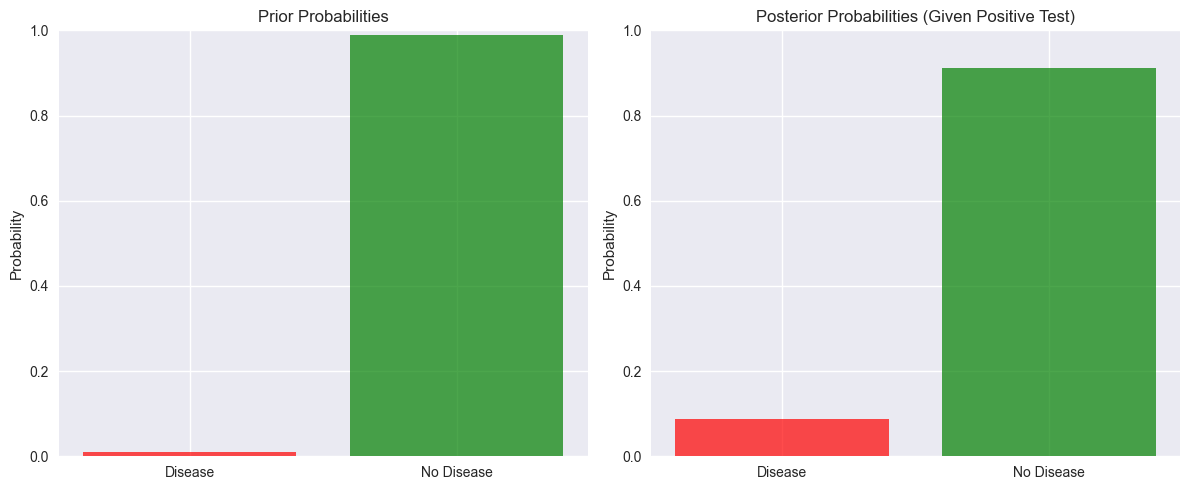

In [3]:
# Example: Medical Test (Bayes' Theorem)
# Disease prevalence: 1% of population
p_disease = 0.01
p_no_disease = 0.99

# Test accuracy: 95% sensitivity, 90% specificity
p_positive_given_disease = 0.95  # sensitivity
p_negative_given_no_disease = 0.90  # specificity
p_positive_given_no_disease = 1 - p_negative_given_no_disease

# Calculate probability of disease given positive test
p_positive = p_positive_given_disease * p_disease + p_positive_given_no_disease * p_no_disease
p_disease_given_positive = (p_positive_given_disease * p_disease) / p_positive

print(f"Probability of disease given positive test: {p_disease_given_positive:.3f}")
print(f"This means only {p_disease_given_positive*100:.1f}% of positive tests are true positives!")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Prior probabilities
ax1.bar(['Disease', 'No Disease'], [p_disease, p_no_disease], color=['red', 'green'], alpha=0.7)
ax1.set_title('Prior Probabilities')
ax1.set_ylabel('Probability')
ax1.set_ylim(0, 1)

# Posterior probabilities
posterior_disease = p_disease_given_positive
posterior_no_disease = 1 - posterior_disease
ax2.bar(['Disease', 'No Disease'], [posterior_disease, posterior_no_disease], 
        color=['red', 'green'], alpha=0.7)
ax2.set_title('Posterior Probabilities (Given Positive Test)')
ax2.set_ylabel('Probability')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()


## 3. Statistical Distributions - Made Simple!

### What are Statistical Distributions? (Think of them like this...)

Imagine you're measuring the heights of all students in a school. If you plot how many students have each height, you'll get a **distribution** - a pattern that shows how the heights are spread out.

**Key Idea:** Distributions tell us how likely different values are to occur.

### The Normal Distribution - The "Bell Curve"

The **Normal Distribution** is the most important distribution in statistics and machine learning. It's called the "bell curve" because it looks like a bell!

#### Why is it so important?

1. **Many natural phenomena follow this pattern:**
   - Human heights
   - Test scores
   - Measurement errors
   - Stock price changes

2. **It's mathematically convenient:**
   - Easy to work with
   - Many other distributions become normal with enough data
   - Used in many machine learning algorithms

#### The Bell Curve Properties

**Shape:** Symmetric bell shape
**Center:** The peak is at the mean (average)
**Spread:** The width depends on the standard deviation
**Tails:** The curve never touches zero, but gets very close

#### The 68-95-99.7 Rule (Super Important!)

For any normal distribution:
- **68%** of data falls within 1 standard deviation of the mean
- **95%** of data falls within 2 standard deviations of the mean  
- **99.7%** of data falls within 3 standard deviations of the mean

**Example:** If average height is 170cm with standard deviation 10cm:
- 68% of people are between 160cm and 180cm
- 95% of people are between 150cm and 190cm
- 99.7% of people are between 140cm and 200cm

### Other Important Distributions

#### 1. Uniform Distribution
- **What it looks like:** Flat line (all values equally likely)
- **Example:** Rolling a fair die
- **Use in ML:** Random initialization of weights

#### 2. Binomial Distribution
- **What it looks like:** Multiple peaks
- **Example:** Number of heads when flipping a coin 10 times
- **Use in ML:** Classification problems

#### 3. Poisson Distribution
- **What it looks like:** Skewed to the right
- **Example:** Number of emails you receive per day
- **Use in ML:** Count data, rare events

### Why Distributions Matter in Machine Learning

1. **Data Understanding:** Helps us understand our data better
2. **Model Selection:** Different algorithms work better with different distributions
3. **Feature Engineering:** We might transform data to follow a normal distribution
4. **Error Analysis:** We assume errors follow certain distributions
5. **Confidence Intervals:** Help us understand uncertainty in predictions

### The Math (Simplified)

**Normal Distribution Formula:**
$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

**Don't worry about the formula!** The key concepts are:
- **μ (mu):** The mean (center of the bell)
- **σ (sigma):** The standard deviation (width of the bell)
- **e:** A special number (about 2.718)
- **π (pi):** Another special number (about 3.14159)


### Visual Examples: Understanding Distributions

Let's see different distributions in action with simple examples!


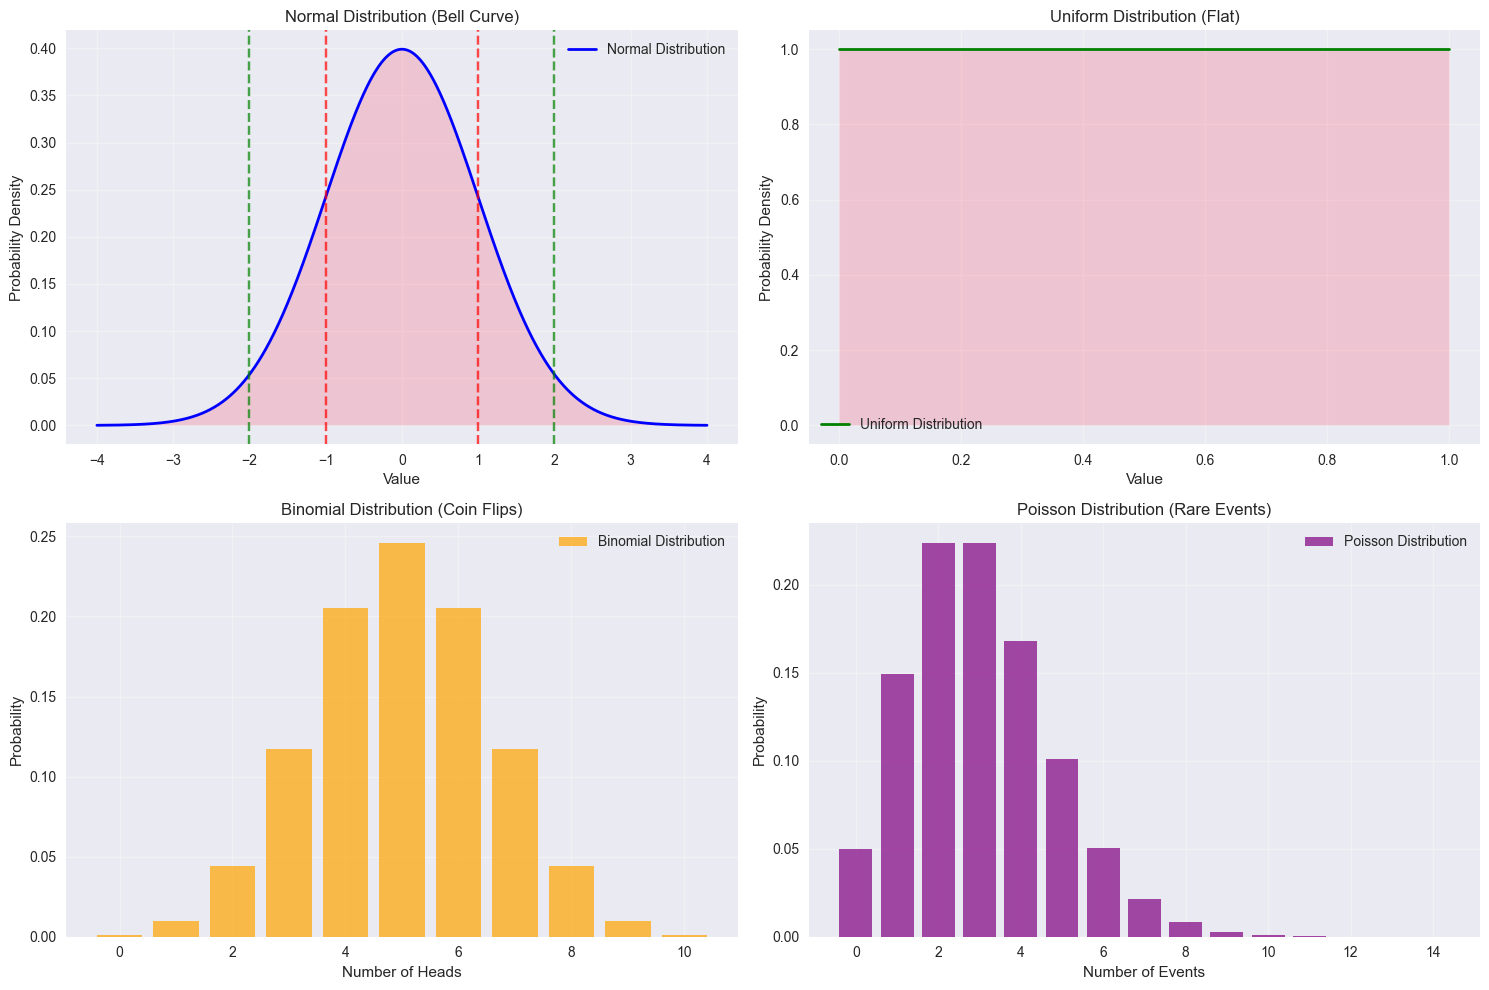

Distribution Examples:
1. NORMAL: Most values cluster around the center (like human heights)
2. UNIFORM: All values are equally likely (like rolling a fair die)
3. BINOMIAL: Multiple peaks (like number of heads in coin flips)
4. POISSON: Skewed to the right (like number of emails per day)

Key Insight: Different situations create different patterns!
Understanding these patterns helps us choose the right machine learning approach.


In [4]:
# Visual Examples of Different Distributions
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Normal Distribution (Bell Curve)
x = np.linspace(-4, 4, 1000)
y_normal = stats.norm.pdf(x, 0, 1)  # mean=0, std=1

axes[0, 0].plot(x, y_normal, 'b-', linewidth=2, label='Normal Distribution')
axes[0, 0].fill_between(x, y_normal, alpha=0.3)
axes[0, 0].set_title('Normal Distribution (Bell Curve)')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Add 68-95-99.7 rule visualization
axes[0, 0].axvline(-1, color='r', linestyle='--', alpha=0.7, label='±1σ (68%)')
axes[0, 0].axvline(1, color='r', linestyle='--', alpha=0.7)
axes[0, 0].axvline(-2, color='g', linestyle='--', alpha=0.7, label='±2σ (95%)')
axes[0, 0].axvline(2, color='g', linestyle='--', alpha=0.7)

# 2. Uniform Distribution (Flat)
x_uniform = np.linspace(0, 1, 1000)
y_uniform = np.ones_like(x_uniform)  # All values equally likely

axes[0, 1].plot(x_uniform, y_uniform, 'g-', linewidth=2, label='Uniform Distribution')
axes[0, 1].fill_between(x_uniform, y_uniform, alpha=0.3)
axes[0, 1].set_title('Uniform Distribution (Flat)')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# 3. Binomial Distribution (Multiple peaks)
n = 10  # Number of trials
p = 0.5  # Probability of success
x_binomial = np.arange(0, n+1)
y_binomial = stats.binom.pmf(x_binomial, n, p)

axes[1, 0].bar(x_binomial, y_binomial, alpha=0.7, color='orange', label='Binomial Distribution')
axes[1, 0].set_title('Binomial Distribution (Coin Flips)')
axes[1, 0].set_xlabel('Number of Heads')
axes[1, 0].set_ylabel('Probability')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# 4. Poisson Distribution (Skewed)
lambda_param = 3  # Average rate
x_poisson = np.arange(0, 15)
y_poisson = stats.poisson.pmf(x_poisson, lambda_param)

axes[1, 1].bar(x_poisson, y_poisson, alpha=0.7, color='purple', label='Poisson Distribution')
axes[1, 1].set_title('Poisson Distribution (Rare Events)')
axes[1, 1].set_xlabel('Number of Events')
axes[1, 1].set_ylabel('Probability')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print explanations
print("Distribution Examples:")
print("=" * 50)
print("1. NORMAL: Most values cluster around the center (like human heights)")
print("2. UNIFORM: All values are equally likely (like rolling a fair die)")
print("3. BINOMIAL: Multiple peaks (like number of heads in coin flips)")
print("4. POISSON: Skewed to the right (like number of emails per day)")
print("\nKey Insight: Different situations create different patterns!")
print("Understanding these patterns helps us choose the right machine learning approach.")


### Practical Example: Spam Email Detection

Let's see how conditional probability and Bayes' theorem work in a real-world scenario!


Email Dataset Summary:
Total emails: 1000
Spam emails: 300 (30.0%)
Ham emails: 700 (70.0%)

Prior Probabilities:
P(Spam) = 0.300
P(Ham) = 0.700

Conditional Probabilities (Given Spam):
P(Urgent | Spam) = 0.710
P(Money | Spam) = 0.750
P(Free | Spam) = 0.860

Conditional Probabilities (Given Ham):
P(Urgent | Ham) = 0.206
P(Money | Ham) = 0.089
P(Free | Ham) = 0.070

BAYES' THEOREM IN ACTION
New email characteristics:
- Contains 'urgent': 1
- Contains 'money': 1
- Contains 'free': 0

Bayes' Theorem Calculation:
P(Urgent AND Money | Spam) = 0.540
P(Urgent AND Money | Ham) = 0.019
P(Urgent AND Money) = 0.175

P(Spam | Urgent AND Money) = 0.926
P(Ham | Urgent AND Money) = 0.074

Prediction: SPAM (confidence: 92.6%)


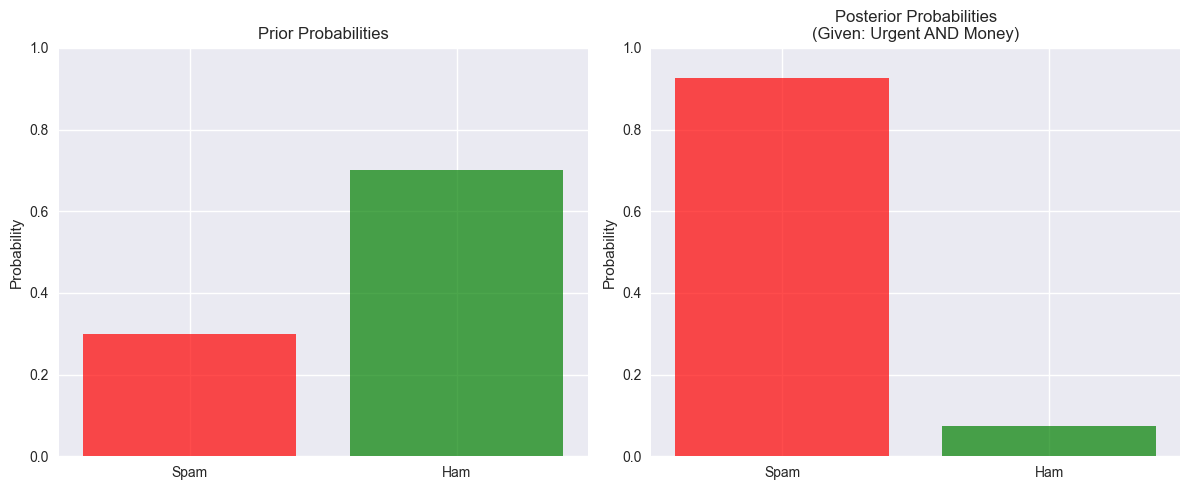


Key Insight:
Even though spam emails are only 30% of all emails, when an email contains
both 'urgent' and 'money' words, there's a 92.6% chance it's spam!
This is how Bayes' theorem helps us update our beliefs with new evidence.


In [5]:
# Spam Email Detection Example
import numpy as np
import matplotlib.pyplot as plt

# Simulate email data
np.random.seed(42)

# Email characteristics
n_emails = 1000
emails = []

# Generate spam emails (30% of total)
n_spam = int(0.3 * n_emails)
for i in range(n_spam):
    # Spam emails are more likely to have certain words
    has_urgent = np.random.choice([0, 1], p=[0.3, 0.7])  # 70% chance
    has_money = np.random.choice([0, 1], p=[0.2, 0.8])   # 80% chance
    has_free = np.random.choice([0, 1], p=[0.1, 0.9])    # 90% chance
    emails.append({'type': 'spam', 'urgent': has_urgent, 'money': has_money, 'free': has_free})

# Generate ham emails (70% of total)
n_ham = n_emails - n_spam
for i in range(n_ham):
    # Ham emails are less likely to have spam words
    has_urgent = np.random.choice([0, 1], p=[0.8, 0.2])  # 20% chance
    has_money = np.random.choice([0, 1], p=[0.9, 0.1])   # 10% chance
    has_free = np.random.choice([0, 1], p=[0.95, 0.05])  # 5% chance
    emails.append({'type': 'ham', 'urgent': has_urgent, 'money': has_money, 'free': has_free})

# Convert to arrays for easier calculation
spam_emails = [e for e in emails if e['type'] == 'spam']
ham_emails = [e for e in emails if e['type'] == 'ham']

print("Email Dataset Summary:")
print("=" * 50)
print(f"Total emails: {len(emails)}")
print(f"Spam emails: {len(spam_emails)} ({len(spam_emails)/len(emails)*100:.1f}%)")
print(f"Ham emails: {len(ham_emails)} ({len(ham_emails)/len(emails)*100:.1f}%)")

# Calculate probabilities
p_spam = len(spam_emails) / len(emails)
p_ham = len(ham_emails) / len(emails)

print(f"\nPrior Probabilities:")
print(f"P(Spam) = {p_spam:.3f}")
print(f"P(Ham) = {p_ham:.3f}")

# Calculate conditional probabilities for spam
spam_with_urgent = sum(1 for e in spam_emails if e['urgent'])
spam_with_money = sum(1 for e in spam_emails if e['money'])
spam_with_free = sum(1 for e in spam_emails if e['free'])

p_urgent_given_spam = spam_with_urgent / len(spam_emails)
p_money_given_spam = spam_with_money / len(spam_emails)
p_free_given_spam = spam_with_free / len(spam_emails)

print(f"\nConditional Probabilities (Given Spam):")
print(f"P(Urgent | Spam) = {p_urgent_given_spam:.3f}")
print(f"P(Money | Spam) = {p_money_given_spam:.3f}")
print(f"P(Free | Spam) = {p_free_given_spam:.3f}")

# Calculate conditional probabilities for ham
ham_with_urgent = sum(1 for e in ham_emails if e['urgent'])
ham_with_money = sum(1 for e in ham_emails if e['money'])
ham_with_free = sum(1 for e in ham_emails if e['free'])

p_urgent_given_ham = ham_with_urgent / len(ham_emails)
p_money_given_ham = ham_with_money / len(ham_emails)
p_free_given_ham = ham_with_free / len(ham_emails)

print(f"\nConditional Probabilities (Given Ham):")
print(f"P(Urgent | Ham) = {p_urgent_given_ham:.3f}")
print(f"P(Money | Ham) = {p_money_given_ham:.3f}")
print(f"P(Free | Ham) = {p_free_given_ham:.3f}")

# Now let's use Bayes' theorem to classify a new email
print(f"\n" + "="*50)
print("BAYES' THEOREM IN ACTION")
print("="*50)

# New email: has "urgent" and "money" words
new_email = {'urgent': 1, 'money': 1, 'free': 0}

print(f"New email characteristics:")
print(f"- Contains 'urgent': {new_email['urgent']}")
print(f"- Contains 'money': {new_email['money']}")
print(f"- Contains 'free': {new_email['free']}")

# Calculate P(Spam | Urgent AND Money) using Bayes' theorem
# P(Spam | Urgent AND Money) = P(Urgent AND Money | Spam) * P(Spam) / P(Urgent AND Money)

# Calculate P(Urgent AND Money | Spam)
spam_with_both = sum(1 for e in spam_emails if e['urgent'] and e['money'])
p_both_given_spam = spam_with_both / len(spam_emails)

# Calculate P(Urgent AND Money | Ham)
ham_with_both = sum(1 for e in ham_emails if e['urgent'] and e['money'])
p_both_given_ham = ham_with_both / len(ham_emails)

# Calculate P(Urgent AND Money) using law of total probability
p_both = p_both_given_spam * p_spam + p_both_given_ham * p_ham

# Apply Bayes' theorem
p_spam_given_both = (p_both_given_spam * p_spam) / p_both
p_ham_given_both = (p_both_given_ham * p_ham) / p_both

print(f"\nBayes' Theorem Calculation:")
print(f"P(Urgent AND Money | Spam) = {p_both_given_spam:.3f}")
print(f"P(Urgent AND Money | Ham) = {p_both_given_ham:.3f}")
print(f"P(Urgent AND Money) = {p_both:.3f}")
print(f"\nP(Spam | Urgent AND Money) = {p_spam_given_both:.3f}")
print(f"P(Ham | Urgent AND Money) = {p_ham_given_both:.3f}")

# Make prediction
if p_spam_given_both > p_ham_given_both:
    prediction = "SPAM"
    confidence = p_spam_given_both
else:
    prediction = "HAM"
    confidence = p_ham_given_both

print(f"\nPrediction: {prediction} (confidence: {confidence:.1%})")

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Prior probabilities
ax1.bar(['Spam', 'Ham'], [p_spam, p_ham], color=['red', 'green'], alpha=0.7)
ax1.set_title('Prior Probabilities')
ax1.set_ylabel('Probability')
ax1.set_ylim(0, 1)

# Posterior probabilities
ax2.bar(['Spam', 'Ham'], [p_spam_given_both, p_ham_given_both], 
        color=['red', 'green'], alpha=0.7)
ax2.set_title('Posterior Probabilities\n(Given: Urgent AND Money)')
ax2.set_ylabel('Probability')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"\nKey Insight:")
print(f"Even though spam emails are only 30% of all emails, when an email contains")
print(f"both 'urgent' and 'money' words, there's a {p_spam_given_both:.1%} chance it's spam!")
print(f"This is how Bayes' theorem helps us update our beliefs with new evidence.")


## Summary: What You've Learned About Probability and Statistics

### Key Takeaways

1. **Conditional Probability** is about updating your beliefs when you get new information. It's like asking "Given that I know X, what's the probability of Y?"

2. **Bayes' Theorem** is the mathematical way to update your beliefs. It's like being a detective who gets new clues and updates their theory.

3. **Statistical Distributions** are patterns that show how likely different values are. The normal distribution (bell curve) is the most important one.

4. **The 68-95-99.7 Rule** is super useful for understanding normal distributions and making predictions.

### Real-World Applications

- **Medical Testing:** "If I test positive, what's the probability I actually have the disease?"
- **Spam Detection:** "If an email contains certain words, what's the probability it's spam?"
- **Recommendation Systems:** "If a user likes action movies, what's the probability they'll like this new movie?"
- **Quality Control:** "If a product passes this test, what's the probability it's actually good?"

### Why This Matters for Machine Learning

1. **Understanding Data:** Probability helps you understand patterns in your data
2. **Making Predictions:** Statistics help you make confident predictions
3. **Handling Uncertainty:** Real-world data is messy, and probability helps you deal with that
4. **Choosing Algorithms:** Different algorithms work better with different types of data distributions

### Next Steps

Now that you understand these concepts, you can:
1. Apply them to analyze your own datasets
2. Use them to choose the right machine learning algorithms
3. Learn about more advanced statistical methods
4. Build more robust machine learning models

**Remember:** Probability and statistics are the foundation of machine learning. The better you understand them, the better you'll be at building and interpreting ML models!


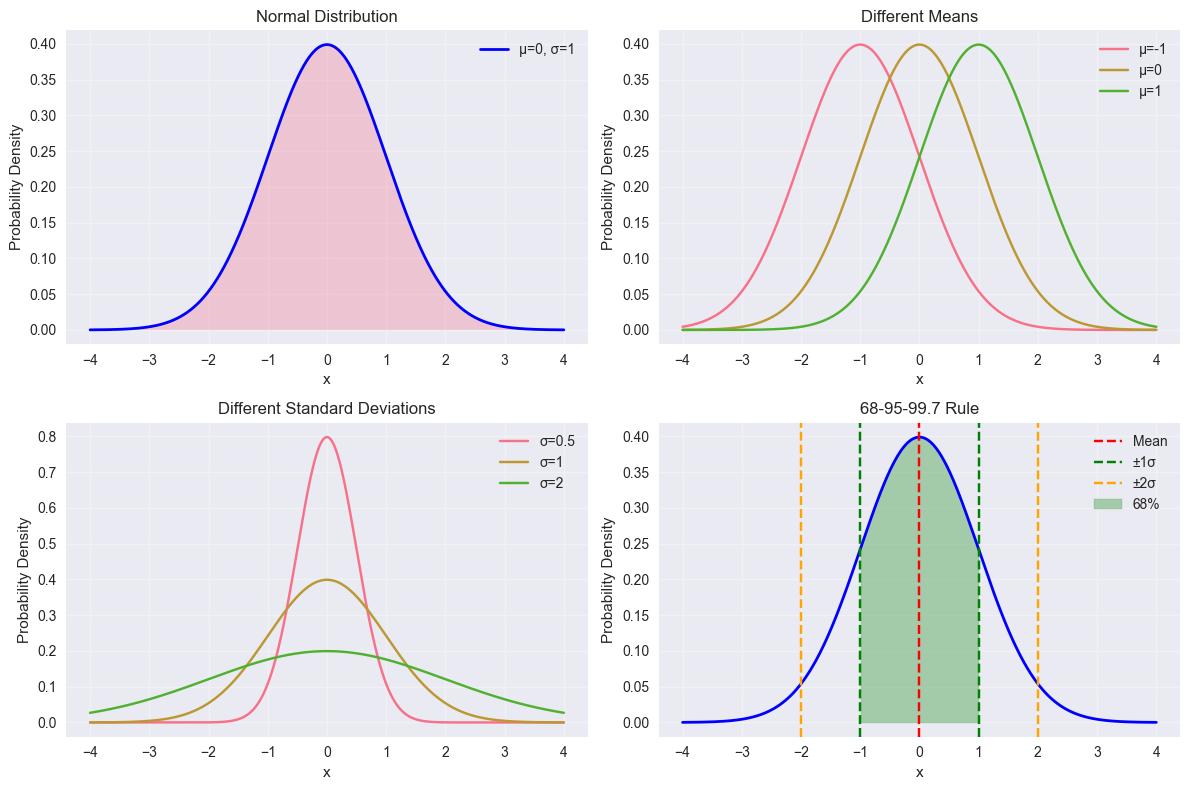

Normal Distribution Probabilities:
P(-1 < X < 1) = 0.683 (should be ~0.683)
P(-2 < X < 2) = 0.954 (should be ~0.954)
P(-3 < X < 3) = 0.997 (should be ~0.997)


In [6]:
# Normal distribution visualization
from scipy.stats import norm

# Parameters
mu = 0
sigma = 1
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Plot normal distribution
plt.figure(figsize=(12, 8))

# Main plot
plt.subplot(2, 2, 1)
plt.plot(x, y, 'b-', linewidth=2, label=f'μ={mu}, σ={sigma}')
plt.fill_between(x, y, alpha=0.3)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Different means
plt.subplot(2, 2, 2)
for mu_val in [-1, 0, 1]:
    y_val = norm.pdf(x, mu_val, 1)
    plt.plot(x, y_val, label=f'μ={mu_val}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Different Means')
plt.legend()
plt.grid(True, alpha=0.3)

# Different standard deviations
plt.subplot(2, 2, 3)
for sigma_val in [0.5, 1, 2]:
    y_val = norm.pdf(x, 0, sigma_val)
    plt.plot(x, y_val, label=f'σ={sigma_val}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Different Standard Deviations')
plt.legend()
plt.grid(True, alpha=0.3)

# 68-95-99.7 rule
plt.subplot(2, 2, 4)
plt.plot(x, y, 'b-', linewidth=2)
plt.axvline(mu, color='r', linestyle='--', label='Mean')
plt.axvline(mu + sigma, color='g', linestyle='--', label='±1σ')
plt.axvline(mu - sigma, color='g', linestyle='--')
plt.axvline(mu + 2*sigma, color='orange', linestyle='--', label='±2σ')
plt.axvline(mu - 2*sigma, color='orange', linestyle='--')
plt.fill_between(x[(x >= mu-sigma) & (x <= mu+sigma)], 
                 y[(x >= mu-sigma) & (x <= mu+sigma)], 
                 alpha=0.3, color='green', label='68%')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('68-95-99.7 Rule')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate probabilities
print("Normal Distribution Probabilities:")
print(f"P(-1 < X < 1) = {norm.cdf(1) - norm.cdf(-1):.3f} (should be ~0.683)")
print(f"P(-2 < X < 2) = {norm.cdf(2) - norm.cdf(-2):.3f} (should be ~0.954)")
print(f"P(-3 < X < 3) = {norm.cdf(3) - norm.cdf(-3):.3f} (should be ~0.997)")
